In [80]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Recorte, extracción y cambio de perspectiva

En esta sección vamos a recortar una de las cartas, extraerla y rotarla para que se vea de frente.

Para eso vamos a:

1. Identificar las cuatros esquinas de la carta en cuestión (Vamos a extraer el rey de picas del frente y rotarlo).
2. Crear una matriz de transformación de cambio perspectiva. Para esto especificaremos los puntos 4 puntos de origen y los 4 puntos de destino y vamos a llamar a `cv2.getPerspectiveTransform(pts1, pts2)` que va a construir la matriz que nos va a servir para realizar esta transformación

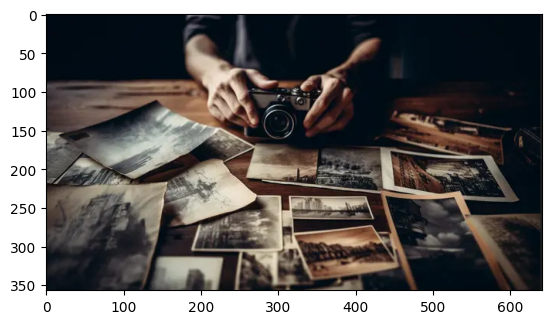

In [82]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagenes/camara_fotos.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

3. Finalmente, vamos a aplicarla con `cv2.wrapPerspective()`, que va a extraer el area delimitada en la imagen original y aplicar la matriz de cambio de perspectiva para generar una imagen única recortada y con una nueva alineación.

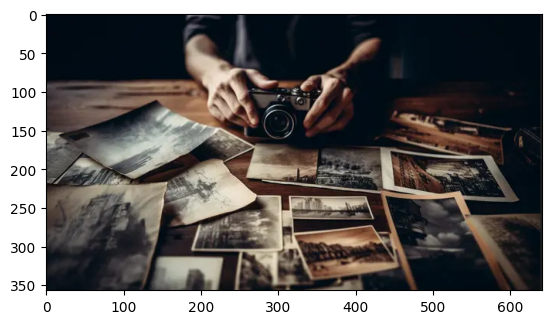

In [83]:
# Comencemos abriendo la imagen
img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagenes/camara_fotos.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [84]:
img.shape

(357, 642, 3)

Ahora vamos a identificar, a ojo, las coordenadas de las esquinas de la carta que queremos extraer y cambiar de perspectiva:

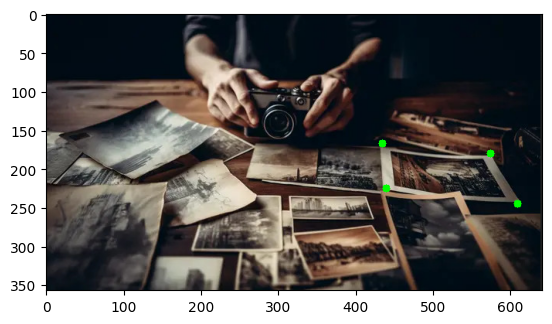

In [85]:
# Primero coordenada x, despues coordenada y
corners = [(435, 167), # Superior izquierdo
           (440, 225), # Inferior izquierdo
           (575, 180), # Superior derecho
           (610, 245) # Inferior derecho
          ]

for x, y in corners:
    cv2.circle(img, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(img);

Creamos la matriz de cambio de perspectiva. Para eso, especificamos los puntos originales y a donde va a ir cada uno en la imagen final. Debemos decidir el tamaño de la imagen final

In [86]:
w, h = 250, 350

In [87]:
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

In [88]:
# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

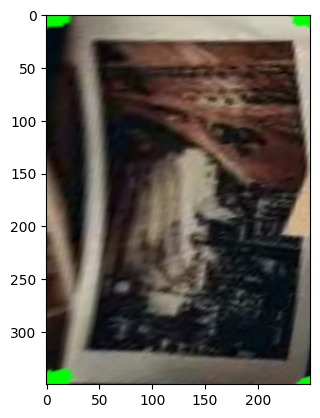

In [89]:
# Y la aplicamos con warpPerspective
# El segundo parametro es esta matriz y el tercero debe ser una tupla con especificando (ancho, alto)
img_output = cv2.warpPerspective(img, matrix, (w, h))
plt.imshow(img_output);

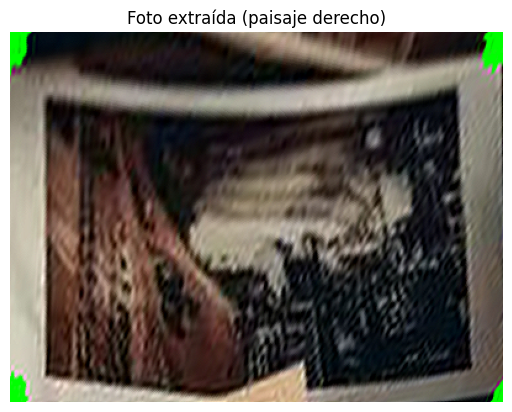

In [90]:
# Coordenadas de la foto del paisaje (en orden: superior izq, inferior izq, superior der, inferior der)
src_pts = np.float32([
    (435, 167), # Superior izquierdo
    (440, 225), # Inferior izquierdo
    (575, 180), # Superior derecho
    (610, 245) # Inferior derecho
          ])

for x, y in corners:
    cv2.circle(img, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(img);

# Tamaño deseado de salida
w, h = 200, 150  # Puedes ajustarlo según la resolución que desees
scale = 2  # Escalado para mejor detalle
w_scaled, h_scaled = w * scale, h * scale

# Puntos de destino (foto rectificada)
dst_pts = np.float32([
    [0, 0],
    [0, h_scaled],
    [w_scaled, 0],
    [w_scaled, h_scaled]
])

# Matriz de transformación
matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Aplicar warpPerspective con interpolación de alta calidad
img_output = cv2.warpPerspective(img, matrix, (w_scaled, h_scaled), flags=cv2.INTER_LANCZOS4)

# (Opcional) aplicar filtro de nitidez
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img_output = cv2.filter2D(img_output, -1, kernel)

# Mostrar imagen extraída
plt.imshow(img_output)
plt.axis('off')
plt.title("Foto extraída (paisaje derecho)")
plt.show()
